# **Module**: PLS-based Multivariate Statistical Process Monitoring
## **Lecture**: PLS: LDPE reactor modeling
### *Topic*:  PLS model fitting via Sklearn

In [20]:
# import required packages
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

In [21]:
# ==================================================================================
#                        Read and explore dataset
# ==================================================================================

In [22]:
# fetch data
data_raw = pd.read_csv('LDPE.csv', usecols = range(1,20))

print("\n First few rows:")
print(data_raw.head())


 First few rows:
      Tin   Tmax1   Tout1   Tmax2   Tout2   Tcin1   Tcin2     z1     z2  \
0  208.17  296.35  233.81  283.41  239.05  117.14  117.20  0.029  0.581   
1  207.26  298.26  230.88  287.55  242.55  116.39  117.23  0.028  0.574   
2  205.30  296.57  235.38  284.35  245.19  117.33  118.42  0.031  0.578   
3  209.29  294.11  225.61  283.31  242.04  116.15  117.94  0.030  0.581   
4  206.76  295.13  230.26  283.74  244.92  116.75  118.49  0.030  0.579   

      Fi1     Fi2     Fs1     Fs2  Press    Conv     Mn      Mw    LCB    SCB  
0  0.4507  0.4518  666.42  248.95   3021  0.1322  27379  160326  0.781  26.11  
1  0.4765  0.5091  658.61  246.36   3033  0.1365  27043  165044  0.819  26.29  
2  0.4744  0.4505  666.51  244.65   3004  0.1335  27344  165621  0.801  26.13  
3  0.4429  0.4516  667.31  242.28   2980  0.1300  27502  160497  0.778  25.92  
4  0.4394  0.4414  670.83  244.31   2997  0.1316  27518  165713  0.786  26.02  


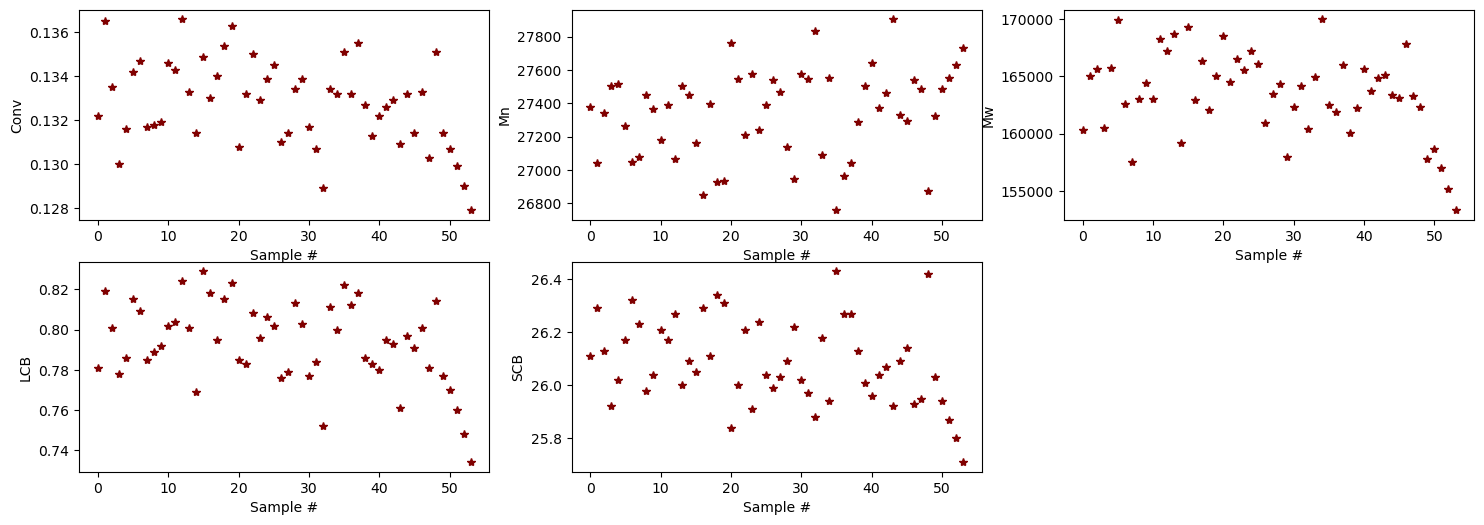

In [23]:
#%% visualize the quality variables
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

# Plot each column directly with matplotlib
axes[0,0].plot(data_raw.iloc[:,-5], '*', color='maroon')
axes[0,0].set_ylabel(data_raw.columns[-5])
axes[0,0].set_xlabel('Sample #')

axes[0,1].plot(data_raw.iloc[:,-4], '*', color='maroon')
axes[0,1].set_ylabel(data_raw.columns[-4])
axes[0,1].set_xlabel('Sample #')

axes[0,2].plot(data_raw.iloc[:,-3], '*', color='maroon')
axes[0,2].set_ylabel(data_raw.columns[-3])
axes[0,2].set_xlabel('Sample #')

axes[1,0].plot(data_raw.iloc[:,-2], '*', color='maroon')
axes[1,0].set_ylabel(data_raw.columns[-2])
axes[1,0].set_xlabel('Sample #')

axes[1,1].plot(data_raw.iloc[:,-1], '*', color='maroon')
axes[1,1].set_ylabel(data_raw.columns[-1])
axes[1,1].set_xlabel('Sample #')

# Remove the last (empty) subplot
fig.delaxes(axes[1,2])

In [24]:
# ==================================================================================
#                                Fit PLS model 
# ==================================================================================

In [25]:
# separate training data
data = data_raw.values
data_train = data[:-4,:] # exclude last 4 samples
X_train = data_train[:,:-5] # all but last 5 columns
Y_train = data_train[:,-5:] # last 5 columns
           
print('Shape of X_train matrix: ', X_train.shape)
print('Shape of Y_train matrix: ', Y_train.shape)

Shape of X_train matrix:  (50, 14)
Shape of Y_train matrix:  (50, 5)


In [26]:
# scale data
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

X_train_normal = X_scaler.fit_transform(X_train)
Y_train_normal = Y_scaler.fit_transform(Y_train)
           
# fit PLS (retaining all components)
pls = PLSRegression(X_train_normal.shape[1])
pls.fit(X_train_normal, Y_train_normal)

# see the number of components retained
print('Shape of T score matrix: ', pls.x_scores_.shape)
print('Shape of U score matrix: ', pls.y_scores_.shape)

Shape of T score matrix:  (50, 14)
Shape of U score matrix:  (50, 14)


In [27]:
# get the variances of each component in X-space and Y-space
X_scores_variances = np.var(pls.x_scores_, axis=0)
Y_scores_variances = np.var(pls.y_scores_, axis=0)

variances_df = pd.DataFrame({
        'Components': range(1, X_train_normal.shape[1] + 1),
        'X_scores_variances': X_scores_variances,
        'Y_scores_variances': Y_scores_variances
    })
print(variances_df)

    Components  X_scores_variances  Y_scores_variances
0            1            3.747401            3.971018
1            2            1.972447            2.712793
2            3            1.441231            2.030743
3            4            1.228413            1.516889
4            5            1.540896            2.026553
5            6            0.716049            2.455929
6            7            0.905192            2.009158
7            8            0.278950            0.539292
8            9            0.298668            0.362416
9           10            0.127824            0.253070
10          11            0.006349            0.008168
11          12            0.000501            0.001638
12          13            0.000046            0.000230
13          14            0.000023            0.000353


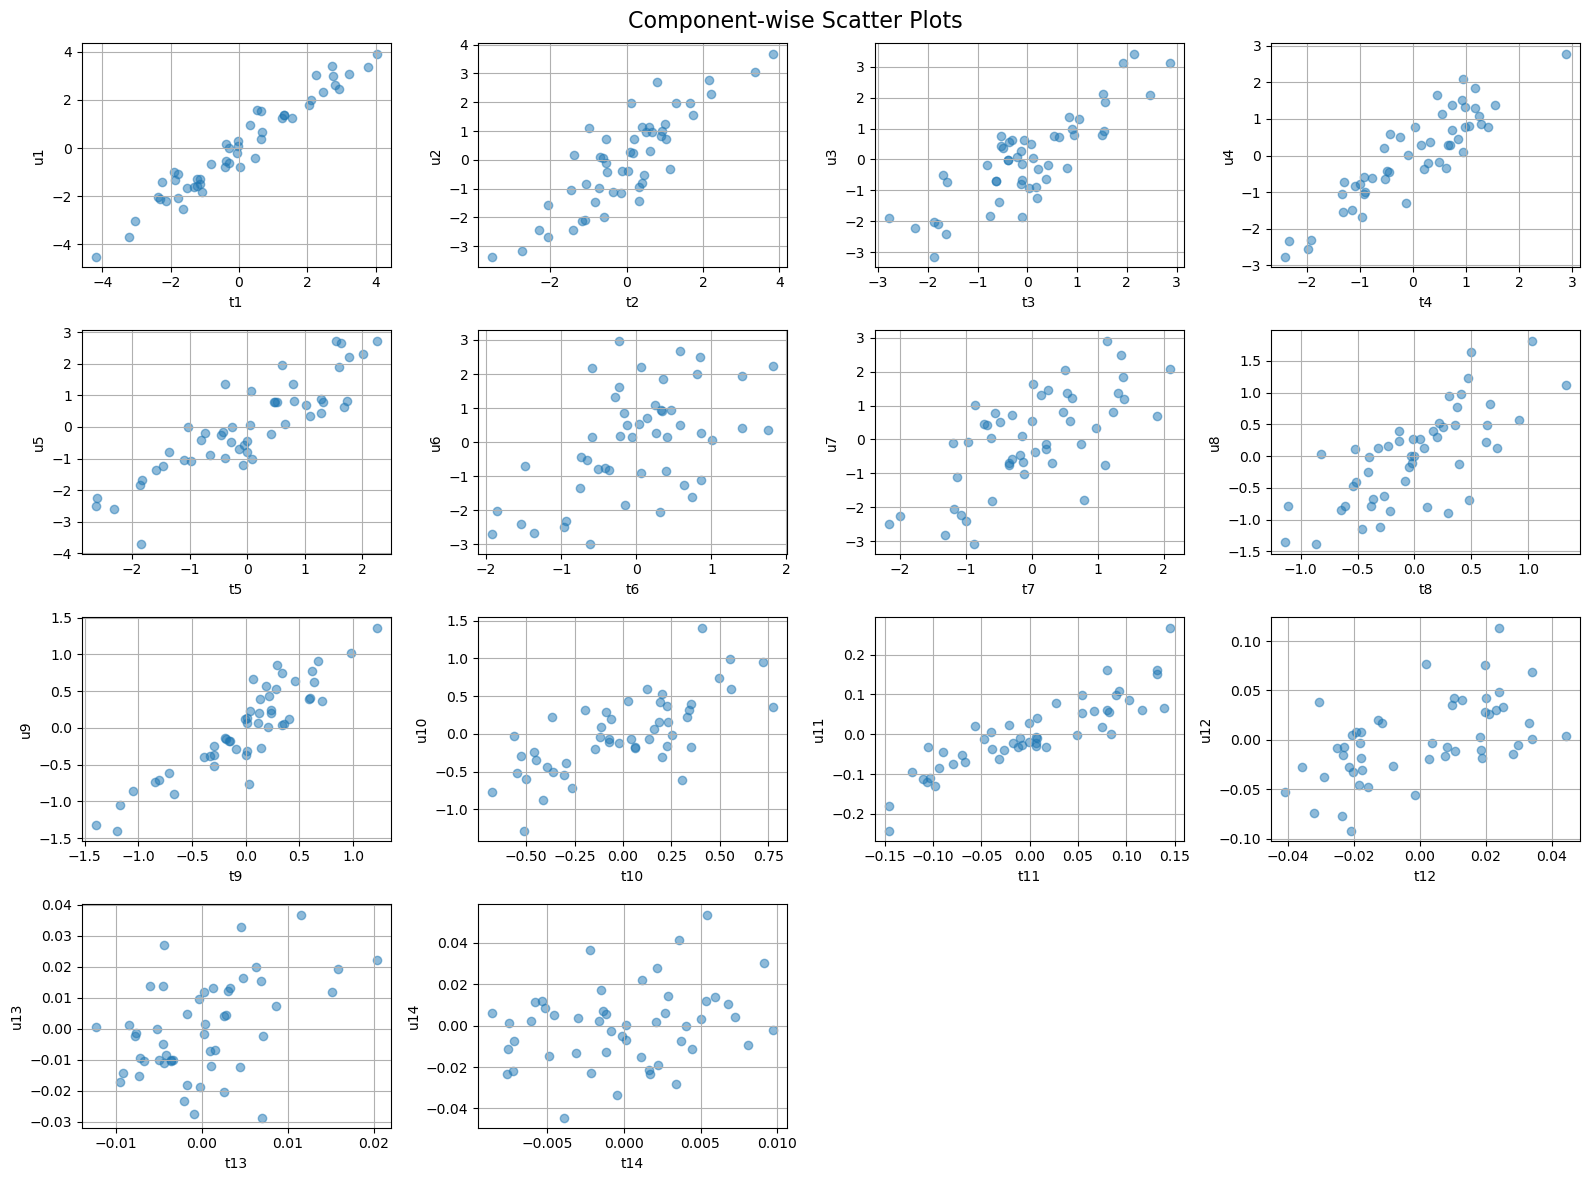

In [28]:
# plot ui vs ti for different componenets
n_rows, n_cols = 4, 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
fig.suptitle('Component-wise Scatter Plots', fontsize=16)

# Handle different subplot grid configurations
for i in range(X_train_normal.shape[1]):
    row = i // n_cols
    col = i % n_cols
            
    axes[row, col].scatter(pls.x_scores_[:, i], pls.y_scores_[:, i], alpha=0.5)
    axes[row, col].set_xlabel(f't{i+1}')
    axes[row, col].set_ylabel(f'u{i+1}')
    axes[row, col].grid(True)

# Remove the (empty) subplots
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,3])

plt.tight_layout()
plt.show()


In [29]:
# ==================================================================================
#   Check variance captured in X-space and Y-space by each component cumulatively
# ==================================================================================

In [30]:
# chk explained variances in X space and Y space 
x_var_explained = []
y_var_explained = []

# Calculate variance explained for different numbers of components
for n_comp in range(1, X_train_normal.shape[1] + 1):
    # Reconstruct X using n_comp components
    X_reconstructed = np.dot(pls.x_scores_[:, :n_comp], 
                            pls.x_loadings_[:, :n_comp].T)
    
    # Reconstruct y using n_comp components
    y_reconstructed = np.dot(pls.x_scores_[:, :n_comp], 
                            pls.y_loadings_[:, :n_comp].T)
    
    # Calculate explained variances using 1 - SSE/SST
    x_var = 1 - np.sum((X_train_normal - X_reconstructed)**2) / np.sum(X_train_normal**2)
    y_var = 1 - np.sum((Y_train_normal - y_reconstructed)**2) / np.sum(Y_train_normal**2)
    
    x_var_explained.append(x_var)
    y_var_explained.append(y_var)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Components': range(1, X_train_normal.shape[1] + 1),
    'X_Variance_Explained': 100*np.round(x_var_explained, 4),
    'Y_Variance_Explained': 100*np.round(y_var_explained, 4)
})

print(results_df)

    Components  X_Variance_Explained  Y_Variance_Explained
0            1                 27.73                 63.47
1            2                 44.14                 84.21
2            3                 56.03                 89.90
3            4                 66.05                 92.60
4            5                 78.14                 94.20
5            6                 85.59                 95.46
6            7                 93.01                 96.14
7            8                 96.77                 97.58
8            9                 98.97                 99.43
9           10                 99.94                 99.58
10          11                 99.99                 99.87
11          12                 99.99                 99.90
12          13                 99.99                 99.91
13          14                 99.99                 99.91


> ##### Computation of captured variances reveal that just 56% of the information in X can explain almost 90% of the variation in Y; this implies that there are variations in X which have only minor impact on quality variables.

In [31]:
# ==================================================================================
#                 re-fit PLS model with the selected number of components
# ==================================================================================

In [32]:
n_comp = 3

In [33]:
# fit PLS
pls = PLSRegression(n_components=n_comp)
pls.fit(X_train_normal, Y_train_normal)

# see the number of components retained
print('Shape of T score matrix: ', pls.x_scores_.shape)
print('Shape of U score matrix: ', pls.y_scores_.shape)

Shape of T score matrix:  (50, 3)
Shape of U score matrix:  (50, 3)


In [34]:
# ==================================================================================
#                      check predictions of the PLS model
# ==================================================================================

In [35]:
Y_train_pred = Y_scaler.inverse_transform(pls.predict(X_train_normal)) 

from sklearn.metrics import r2_score
print('R2 score: ', 100*r2_score(Y_train, Y_train_pred), '%')

R2 score:  89.90616771156914 %


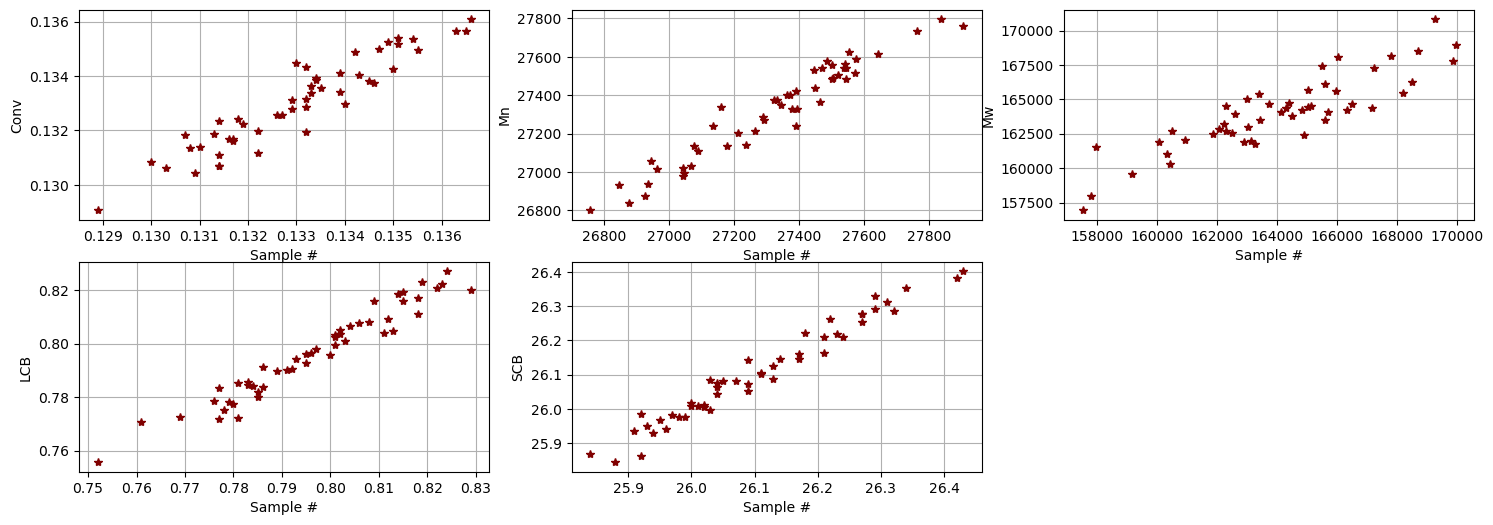

In [36]:
# plot observed vs predicted for each quality variable
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

axes[0,0].plot(Y_train[:,0], Y_train_pred[:,0], '*', color='maroon')
axes[0,0].set_ylabel(data_raw.columns[-5])
axes[0,0].set_xlabel('Sample #')
axes[0,0].grid()

axes[0,1].plot(Y_train[:,1], Y_train_pred[:,1], '*', color='maroon')
axes[0,1].set_ylabel(data_raw.columns[-4])
axes[0,1].set_xlabel('Sample #')
axes[0,1].grid()

axes[0,2].plot(Y_train[:,2], Y_train_pred[:,2], '*', color='maroon')
axes[0,2].set_ylabel(data_raw.columns[-3])
axes[0,2].set_xlabel('Sample #')
axes[0,2].grid()

axes[1,0].plot(Y_train[:,3], Y_train_pred[:,3], '*', color='maroon')
axes[1,0].set_ylabel(data_raw.columns[-2])
axes[1,0].set_xlabel('Sample #')
axes[1,0].grid()

axes[1,1].plot(Y_train[:,4], Y_train_pred[:,4], '*', color='maroon')
axes[1,1].set_ylabel(data_raw.columns[-1])
axes[1,1].set_xlabel('Sample #')
axes[1,1].grid()

# Remove the last (empty) subplot
fig.delaxes(axes[1,2])